# 코로나 확진자 추이 분석
### 사용 데이터 
- [Covid-19 Weekly Trends In World - Latest Data](https://www.kaggle.com/datasets/anandhuh/covid19-weekly-trends-in-world-latest-data)
- now: 최근 1주 [4월 6일 ~ 4월 13일]
- prec: 이전 1주 [3월 30일 ~ 4월 5일]

## Contents
1. 데이터 준비  
1-1. 데이터 읽어오기  
1-2. 전체 데이터 확인하기  
1-3. 데이터 전처리  
2. 데이터 분석  
2-1. 분석 목표 구체화  
2-2. 분석 및 시각화

## 1. 데이터 준비


### 1-1. 데이터 읽어오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("./covid_world_weekly_trend.csv")
covid = data.copy() # 혹시 모를 상황을 대비하여 데이터 복사
covid.head()

,"Country, Other",Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population
0,Afghanistan,308,291,6.0,8.0,5,6,-17,0.1,40483797
1,Albania,236,471,-50.0,82.0,2,0,200,0.7,2872219
2,Algeria,31,48,-35.0,0.7,0,0,0,0.0,45256195
3,Andorra,304,311,-2.0,3923.0,0,0,0,0.0,77484
4,Angola,0,56,-100.0,0.0,0,0,0,0.0,34679470


### 1-2. 전체 데이터 확인하기

In [172]:
print(covid.columns)
print(covid.shape)

Index(['Country, Other', 'Cases in the last 7 days',
       'Cases in the preceding 7 days', 'Weekly Case % Change',
       'Cases in the last 7 days/1M pop', 'Deaths in the last 7 days',
       'Deaths in the preceding 7 days', 'Weekly Death % Change',
       'Deaths in the last 7 days/1M pop', 'Population'],
      dtype='object')
(212, 10)


In [173]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country, Other                    212 non-null    object 
 1   Cases in the last 7 days          212 non-null    int64  
 2   Cases in the preceding 7 days     212 non-null    int64  
 3   Weekly Case % Change              212 non-null    float64
 4   Cases in the last 7 days/1M pop   212 non-null    float64
 5   Deaths in the last 7 days         212 non-null    int64  
 6   Deaths in the preceding 7 days    212 non-null    int64  
 7   Weekly Death % Change             212 non-null    int64  
 8   Deaths in the last 7 days/1M pop  212 non-null    float64
 9   Population                        212 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 16.7+ KB


### 1-3. 데이터 전처리  
1. 결측치 및 중복치 확인
2. 데이터 설계 (필요한 데이터는 무엇인가?)

In [2]:
covid.isnull().sum()

Country, Other                      0
Cases in the last 7 days            0
Cases in the preceding 7 days       0
Weekly Case % Change                0
Cases in the last 7 days/1M pop     0
Deaths in the last 7 days           0
Deaths in the preceding 7 days      0
Weekly Death % Change               0
Deaths in the last 7 days/1M pop    0
Population                          0
dtype: int64

In [3]:
covid.duplicated().sum()

0

column 이름을 좀 더 간단하게 바꾸고, 필요없는 column 지우기

In [4]:
covid.rename(columns={'Country, Other': 'country', 'Cases in the last 7 days': 'cases_now', 'Cases in the preceding 7 days': 'cases_prec', 'Weekly Case % Change': 'case_change',
'Cases in the last 7 days/1M pop': 'cases_1m', 'Deaths in the last 7 days': 'deaths_now', 'Deaths in the preceding 7 days': 'deaths_prec',
'Weekly Death % Change': 'death_change', 'Deaths in the last 7 days/1M pop': 'deaths_1m', 'Population': 'population'
}, inplace=True) # Reanme columns

In [5]:
covid.drop(columns = ['deaths_now', 'deaths_prec','death_change', 'deaths_1m'], inplace=True)

In [6]:
covid.describe().T

,count,mean,std,min,25%,50%,75%,max
cases_now,212.0,3.226665e+04,1.411302e+05,0.0,40.00,420.5,5742.0,1.367873e+06
cases_prec,212.0,4.072566e+04,1.808994e+05,0.0,60.50,587.0,7363.5,1.916973e+06
case_change,212.0,7.387231e+02,5.645690e+03,-100.0,-40.50,-23.0,-1.5,5.150000e+04
cases_1m,212.0,2.527309e+03,6.455296e+03,0.0,6.75,162.5,2312.5,6.013800e+04
population,212.0,3.697350e+07,1.437274e+08,3660.0,640090.00,6629760.5,26403046.0,1.449190e+09


## 2. 데이터 분석

### 2-1. 분석 목표 구체화
1. 인구 수가 많을수록 확진자 수가 많아지는 경향성이 있는가?
2. 누적 확진자 수가 많은 나라에서의 최근(2주) 확진자 수 추이는 어떠한가?

### 2-2. 분석 및 시각화

데이터 간 상관관계 확인해보기

In [7]:
covid.corr()

,cases_now,cases_prec,case_change,cases_1m,population
cases_now,1.000000,0.988608,-0.030285,0.317531,0.062086
cases_prec,0.988608,1.000000,-0.030432,0.319180,0.055180
case_change,-0.030285,-0.030432,1.000000,0.096624,-0.030066
cases_1m,0.317531,0.319180,0.096624,1.000000,-0.066246
population,0.062086,0.055180,-0.030066,-0.066246,1.000000


In [8]:
import scipy.stats as stats

# 피어슨 상관계수 검정 (r, p-value)
print('인구 수와 최근 1주간 확진자 수 :', stats.pearsonr(covid.cases_now, covid.population))
print('인구 수와 이전 1주간 확진자 수 :', stats.pearsonr(covid.cases_prec, covid.population))
print('인구 수와 최근 2주간 확진자 수 변화 :', stats.pearsonr(covid.case_change, covid.population))

인구 수와 최근 1주간 확진자 수 : (0.06208606171224264, 0.3683809554109821)
인구 수와 이전 1주간 확진자 수 : (0.05518047234912976, 0.4241171415612549)
인구 수와 최근 2주간 확진자 수 변화 : (-0.030066264492943164, 0.6633580237551276)


=> 인구 수가 많을 수록 확진자 수가 많다고 결정지을 수 없다.

질병관리청을 참고하여 누적 확진자 수가 많은 나라를 뽑았다. [출처](http://ncov.mohw.go.kr/bdBoardList_Real.do?brdId=1&brdGubun=14&ncvContSeq=&contSeq=&board_id=&gubun=)

In [9]:
top_country = ['USA', 'S. Korea', 'India', 'Brazil','France', 'Germany', 'Russia', 'Italy', 'Turkey', 'UK']
covid_top = covid[covid.country.isin(top_country)].reset_index(drop=True)
covid_top

,country,cases_now,cases_prec,case_change,cases_1m,population
0,Brazil,143800,157732,-9.0,668.0,215241599
1,France,935108,952013,-2.0,14270.0,65529910
2,Germany,977384,1256200,-22.0,11600.0,84259518
3,India,7091,7710,-8.0,5.0,1404087743
4,Italy,438144,476296,-8.0,7266.0,60304008
5,Russia,92721,122601,-24.0,635.0,146045544
6,S. Korea,1367873,1916973,-29.0,26640.0,51347510
7,Turkey,52911,88360,-40.0,616.0,85949948
8,UK,242883,388122,-37.0,3545.0,68519051
9,USA,206520,206409,0.1,617.0,334448237


In [182]:
print(len(covid_top))

10


최근 2주간 데이터에서는 확진자 수의 차이가 국가 간에 크기 때문에, 로그변환을 하여서 비교하고자 했습니다.

In [10]:
covid_top['log_now'] = np.log1p(covid_top['cases_now'])
covid_top['log_prec'] = np.log1p(covid_top['cases_prec'])
covid_top

,country,cases_now,cases_prec,case_change,cases_1m,population,log_now,log_prec
0,Brazil,143800,157732,-9.0,668.0,215241599,11.876186,11.968659
1,France,935108,952013,-2.0,14270.0,65529910,13.748418,13.766335
2,Germany,977384,1256200,-22.0,11600.0,84259518,13.792636,14.043603
3,India,7091,7710,-8.0,5.0,1404087743,8.866723,8.950403
4,Italy,438144,476296,-8.0,7266.0,60304008,12.990305,13.073797
5,Russia,92721,122601,-24.0,635.0,146045544,11.437361,11.716699
6,S. Korea,1367873,1916973,-29.0,26640.0,51347510,14.128768,14.466258
7,Turkey,52911,88360,-40.0,616.0,85949948,10.876385,11.389186
8,UK,242883,388122,-37.0,3545.0,68519051,12.400339,12.869078
9,USA,206520,206409,0.1,617.0,334448237,12.238157,12.237620


In [11]:
covid_top.describe().T

,count,mean,std,min,25%,50%,75%,max
cases_now,10.0,4.464435e+05,4.753248e+05,7.091000e+03,1.054908e+05,2.247015e+05,8.108670e+05,1.367873e+06
cases_prec,10.0,5.572416e+05,6.255530e+05,7.710000e+03,1.313838e+05,2.972655e+05,8.330838e+05,1.916973e+06
case_change,10.0,-1.789000e+01,1.446255e+01,-4.000000e+01,-2.775000e+01,-1.550000e+01,-8.000000e+00,1.000000e-01
cases_1m,10.0,6.586200e+03,8.699129e+03,5.000000e+00,6.215000e+02,2.106500e+03,1.051650e+04,2.664000e+04
population,10.0,2.515733e+08,4.147066e+08,5.134751e+07,6.627720e+07,8.510473e+07,1.979426e+08,1.404088e+09
log_now,10.0,1.223553e+01,1.593632e+00,8.866723e+00,1.154707e+01,1.231925e+01,1.355889e+01,1.412877e+01
log_prec,10.0,1.244816e+01,1.601713e+00,8.950403e+00,1.177969e+01,1.255335e+01,1.359320e+01,1.446626e+01


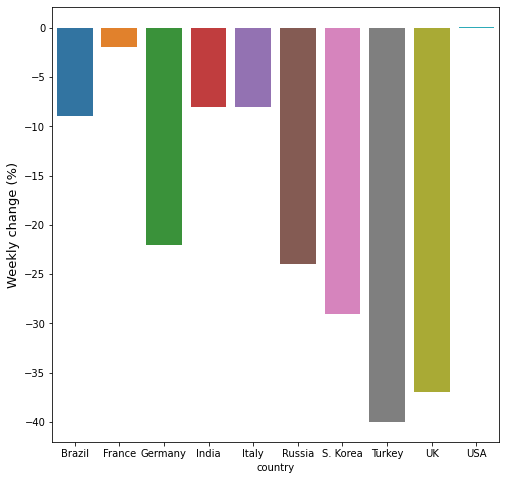

In [12]:
fig, ax = plt.subplots(figsize = (8,8))
sns.barplot(data=covid_top, x='country', y='case_change')
plt.ylabel('Weekly change (%)', size = 13)
plt.show()
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/감소 추세.png', dpi=300)

=> 1. 미국에서는 확진자 수의 변화가 거의 없으며,  
=> 2. 미국을 제외한 나라에서는 각 나라에서 전주 대비 8%~40%, 평균 약 18% 정도 확진자 수가 줄었음을 확인할 수 있습니다.

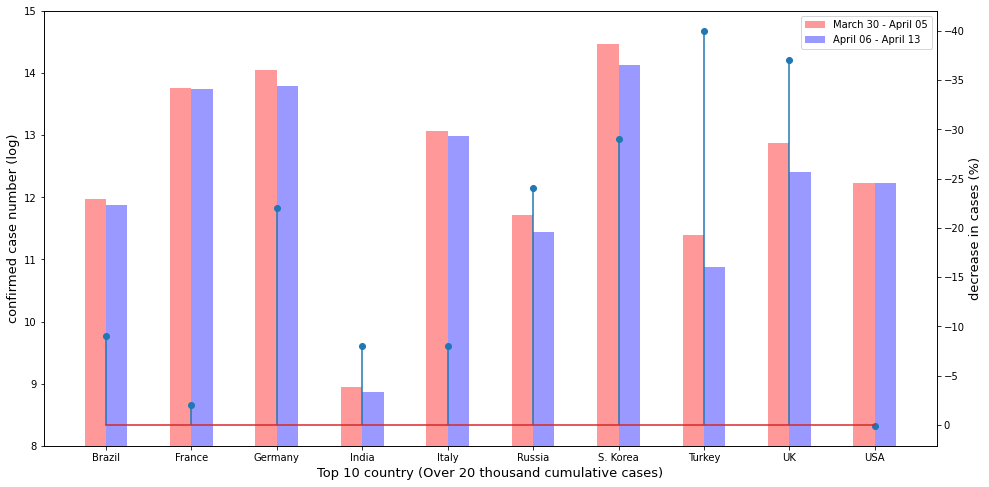

In [26]:
# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(16,8))
bar_width = 0.25

index = np.arange(len(covid_top))

b1 = plt.bar(index - bar_width/2, covid_top['log_prec'], bar_width, alpha=0.4, color='red', label='March 30 - April 05')

b2 = plt.bar(index + bar_width/2, covid_top['log_now'], bar_width, alpha=0.4, color='blue', label='April 06 - April 13')

plt.xticks(np.arange(0, len(covid_top)), labels=covid_top['country'])
plt.ylim(8, 15)

# x축, y축 이름 및 범례 설정
plt.xlabel('Top 10 country (Over 20 thousand cumulative cases)', size = 13)
plt.ylabel('confirmed case number (log)', size = 13)
plt.legend()

ax2 = ax.twinx()
ax2.stem(index, covid_top['case_change'])
ax2.invert_yaxis()
ax2.set_ylabel('decrease in cases (%)', size=13)
plt.show()
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/나라별 확진자 수.png', dpi=300)

In [187]:
temp = pd.DataFrame({})
covid_top.country
for idx in range(len(covid_top['country'])) :
  name = covid_top.country[idx]
  temp[name] = [covid_top.iloc[idx]['cases_prec'], covid_top.iloc[idx]['cases_now']]
temp['total_mean'] = temp.mean(axis=1)
temp

,Brazil,France,Germany,India,Italy,Russia,S. Korea,Turkey,UK,USA,total_mean
0,157732,952013,1256200,7710,476296,122601,1916973,88360,388122,206409,557241.6
1,143800,935108,977384,7091,438144,92721,1367873,52911,242883,206520,446443.5


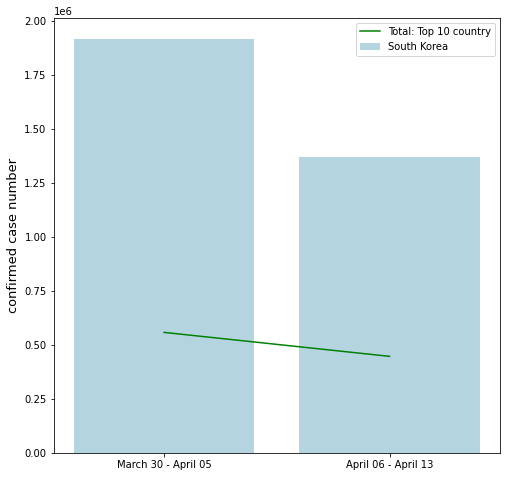

In [200]:
plt.figure(figsize=(8,8))
sns.barplot(data=temp, x=[0,1], y='S. Korea', label='South Korea', color='lightblue')
plt.plot([0,1], temp['total_mean'], color='green', label='Total: Top 10 country')
plt.xticks(np.arange(0,2), labels=['March 30 - April 05', 'April 06 - April 13'])
plt.ylabel('confirmed case number', size=13)
plt.legend()
plt.show()
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/한국과 전체.png', dpi=300)